# Programming for Data Science 2023

## Homework Assigment Three

Homework Assigment Three focus in the step-by-step implementation of a simple, yet popular, clustering algorithm, the **K-Means**. Although in most projects you will source algorithms from readily available implementations found in libraries such as scikit-learn or Keras, in some cases you will need to implement an algorithm yourself. For instance, if such algorithm is not available or if you want to implement a problem-specific modification. In that sense, learning to implement algorithms is an important part of your skillset.

Your submission will be graded according to the following guidelines:
1. **Execution** (does your program does what is asked from the exercise?
2. **Objectivity** (are you using the adequate libraries? are you using a library ... )
3. **Readibility** of your code (that includes comments, naming of variables, supporting text, etc ...)

Some questions might require that you make critical decisions, or design choices. In such cases, you will be graded according to your ability to justify and support your decisions.

<b>Comment your code properly, which includes naming your variables in a meaningful manner. Badly documented code will be penalized.</b>

This assignment is to be done in pairs, and remember that **you can't have the same pair as you had in Homeworks 1 and 2**. 

**Students that are caught cheating will obtain a score of 0 points.** <br>

The Homework 3 is worth 30% of your final grade.    

The submission package should correspond to a .zip archive (.rar files are not accepted) with the following files:
1. Jupyter Notebook with the output of all the cells;
2. PDF/HTML print of your Jupyter Notebook (in jupyter go to File -> Download as -> HTML/PDF);
3. All text or .csv files exported as part of the exercises (if they exist). Do not upload the files downloaded/imported as part of the exercises.

**Please change the name of the notebook to "H3_\<student_1_id\>_\<student_2_id\>.ipynb", replacing \<student_id\> by your student_id.** <br>

Submission is done through the respective Moodle activity and only one of the group members has to submit the files. <br>
Deadline is the 26th of October at 23:59. <br>
A penality of 1 point per day late will be applied to late deliveries. <br>

## **In this notebook you are allowed to use Pandas and Numpy.**

## Group Registration

Edit this cell with the information of the authors of this submission.

|      |     Student Name     |     Student ID     | 
|---   |         ---          |           ---          |
| 1    |      XXXXXXXX        |       XXXXXXXX         | 
| 2    |      XXXXXXXX        |       XXXXXXXX         | 

## Clustering with K-Means

K-means is one of the simplest clustering algorithms, which you may already know from the course Data Mining. The K-means Algorithm consists in writing a program that proceeds as follows:

1. Choose value for K (number of clusters);
2. Initialize the locations of the centroids. This can be done by randomly selecting K points from the dataset as the initial locations of the centroids;
3. Compute the distance of all the other points to each of the K centroids;
4. Associate each point to the cluster of the closest centroid;
5. Update the centroid position. This can be done by computing the average coordinates of all points associated to each cluster;
6. Evaluate the average change in the centroids positions, as a measure of convergence (the algorithm is said to have converged to the solution when the positions of the centroids do not change more than a given tolerance threshold);
7. Repeat steps 3-6 until either the centroids no longer move more than a tolerance threshold or until you have repeated these steps for specified number of iterations (niter)

The algorithm is thus parameterized by the **number of clusters (K)**, the **maximum number of iterations** (niter), and the **tolerance threshold (tol)**.

### Step 1

Let us start by importing the necessary libraries to execute this homework. <br>
Import **numpy, Scipy, and pandas** using, respectively, the **aliases np, sc, and pd**.

<span style="color:red">**These are the only libraries you are allowed to use in the remaining of the steps, unless explicitly said the opposite/if the library is imported in the cells below.**</span>

In [571]:
import numpy
import numpy as np
import pandas
import pandas as pd
import scipy as sc

It is important that we devise a strategy to **test our code at each step**, in order to assess if it performs as expected. To that end, we have split each step of the algorithm in different blocks, and we ask you to test each block against a simple scenario where the outcome is predictable and can be computed by hand. In some steps, however, we want to pass a more comprehensive data set with similar properties to the real dataset we will be working with.<br>

Such test datasets try to create realistic conditions in which your algorithm is expected to work correctly, and for which we can also assess if the solution matches our expectation and have a general understanding if the algorithm performs as expected in "real-world" conditions.<br>

For this homework we will resort to a dataset that contains two clearly distinct clusters. We generated the clusters by sampling points from two distinct gaussian distributions with different averages and same standard deviation. <br>

As such, our algorithm should be able to identify each cluster easily, and place the centroids close to the averages of the two distributions. <br>

**Run the cell below to download, load the data into a numpy array, and visualize your Test dataset.**<br>
You will run your algorithm implementation against this dataset as a proof of work.

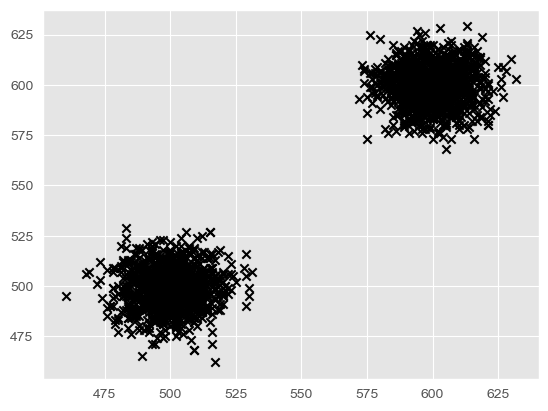

In [572]:
import matplotlib.pyplot as plt

# download the file into a dataframes and convert it to a numpy array.
data_test = pd.read_csv("https://www.dropbox.com/s/gax1l68jsarxqt9/data_test.txt?dl=1", header=None).to_numpy()

#plot the points into a scatter plot
plt.scatter(data_test[:, 0], data_test[:,1], color ='k', marker='x')

### Step 2 

Write a function named <b>init</b> that takes two arguments: $points$ and $K$. <br>
The function <b>init</b> should return a numpy ndarray with  $K$ elements sampled randomly and without replacement from $points$. Meaning, the same point should not be picked up twice. <br>

**Show that your function performs as desired by calling it with** $K = 2$ **and on the data_test as the** $points$.

In [573]:
def init(points, k):
    # Create a generator with a random seed (the result will be arbitrary each time).
    # If we need to results to be determinist, we can pass a random seed.
    generator = np.random.default_rng()
    return generator.choice(points, k, replace=False)
    
init(data_test, k=2)

array([[530, 495],
       [587, 599]])

### Step 3

Write a function named <b>distance</b> that takes two arguments: $p1$ and $p2$. <br>
The function <b>distance</b> should return a scalar that corresponds to the euclidian distance between points $p1$ and $p2$, that should have a ndarray format. <br> 
For the assignment you can assume that $p1$ and $p2$ are two-dimensional ndarrays points. But in general, you should assume that p1 and p2 are two ndarrays of the same size.

Recall that the euclidian distance (d) between two points ($p_1$ and $p_2$) in a 2-dimensional space is given by:<br><br>
\begin{equation}
    d(p_1, p_2) = \sqrt{(x_1-x_2)^2 + (y_1-y_2)^2}
\end{equation}<br>
where $p_1 = \{x_1,y_1\}$ and  $p_2 = \{x_2,y_2\}$. 

**Test your function works by computing the distance between p1=(1,3) and p2=(7,2), which is $\approx$ 6.08.**<br>
**Consider using the existing Numpy or Scipy packages for this task**

Can you write a function that computes the euclidian distance between two points of arbitrary dimension? <br>
In general, for arbitrary dimensionality the square of the distance can be computed as:<br><br>
\begin{equation}
    d^2(p_1, p_2) = \sum_{i=0}^{D-1} (x_i-y_i)^2
\end{equation}<br>
where $p_1 = \{x_1,x_2,...,x_{D-1}, x_D\}$ and $p_2 = \{y_1,y_2,...,y_{D-1},y_D\}$.<br>

**Show your function works by computing the distance between (1,3,-9,12) and (7,2,0,5)**

In [574]:
def distance(p1, p2):
    return sc.spatial.distance.euclidean(p1, p2)

In [575]:
# Test variables do not change
p1 = np.array([1,3])
p2 = np.array([7,2])

distance(p1, p2)

In [595]:
# Test with arbitrary dimensionality
p1 = np.array([1,3,-9,12])
p2 = np.array([7,2,0,5])

distance(p1, p2)

12.922847983320086

In [ ]:
arbitrary_dimensionalit = np.sum((p1 - p2)**2)
print(arbitrary_dimensionalit)

### Step 4

Write a function named <b>centroid</b> that takes one argument: $points$.<br>

The argument $points$ should be a ndarray with the coordinates of a set of observations.<br>

The function <b>centroid</b> should return an ndarray with $d$ values (being $d$ the number of dimensions)</span>, the $n^{th}$ index of the returned output ndarray should thus correspond to the averaged of the values in the $n^{th}$ column of the points ndarray. In other words, correspond to the average position along a specific dimension of observations in $points$.</span>

**Test your function and check that it works by using the ndarray TEST**


In [577]:
def centroid(points):
   return np.mean(points, axis=0) 

In [578]:
#Test variables do not change the values
TEST = np.array([[1,2,3,4,5],[0,0,1,1,1],[0,1,2,4,5]])
print(TEST)

[[1 2 3 4 5]
 [0 0 1 1 1]
 [0 1 2 4 5]]


In [579]:
centroid(TEST)

array([0.33333333, 1.        , 2.        , 3.        , 3.66666667])

### Step 5

Write a function <b>cupdate</b> that takes two input arguments: <i>points</i> and <i>clusters</i><br> 

The argument <i>points</i> is a ndarray containing the coordinates of a set of points (1 point per row).<br>

The argument <i>clusters</i> is a 1-dimensional ndarray that indicates the cluster to which each point is associated.<br>

Note that values in <i>clusters</i> are integers and can only take values between 0 and K-1, where K is the total number of clusters.

The function <b>cupdate</b> should return an ndarray with the average coordinates of the points associated to each cluster, that is the centroid of each cluster. The returned array should have the same number of columns as points (dimensions) and length K (rows).

**Test your function and report the centroids generated by passing p and c as inputs with k = 3. Save these centroids as a variable: cen**

In [580]:
# Here we're using pandas to make code cleaner, as we just want to get the mean of each column (by cluster)
def cupdate(points, clusters):
    df = pd.DataFrame(points)
    df['cluster'] = pd.Series(clusters)
    return df.groupby('cluster').mean().to_numpy()

In [581]:
# Tesst variables, do not change the values
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])
c = np.array([2, 0, 0, 1, 1, 0, 0, 1, 0, 1])

In [582]:
cen = cupdate(p, c)
cen

array([[0.44995487, 0.55986467],
       [0.53760985, 0.53912646],
       [0.8922063 , 0.26672425]])

### Step 6

Write a function <b>pupdate</b> that takes two input arguments: $points$ and $centroids$.<br>

The function <b>pupdate</b> should return a one-dimensional ndarray that indicates the index of the centroid that is closer to each point. To determine the distance between a centroid and a point you can use your distance function you created earlier. <br>

You will need to assess the distance between each point to each centroid. Different approaches can be taken to do this. For instance, you can start by computing a *$d$ by $k$* distance matrix matrix between each of the $d$ points and the $k$ centroids.

**Test your function by calling it and passing the array p (as defined above) with the output of cupdate, cen, as arguments. You should get an output that looks like c defined above (but is not exactly the same, can you see why). Print this result and save it in a variable called new_clusters**

In [598]:
def pupdate(points, centroids):
    distance_matrix = np.zeros((len(points), len(centroids)))
    # Loop through each point and centroid to calculate their distances
    for i in range(len(points)):
        for j in range(len(centroids)):
            # Calculate the distance between point[i] and centroid[j]
            distance_matrix[i][j] = distance(points[i], centroids[j])
    # Find the index of the centroid with the minimum distance for each point
    # This will determine which cluster each point belongs to
    return np.argmin(distance_matrix, axis=1)

In [623]:
new_clusters = pupdate(p, cen)
new_clusters

array([3, 4])

### Step 7

Write a function <b>error</b> that takes two input arguments: oldcentroids and newcentroids.<br>

The argument oldcentroids corresponds to a ndarray with centroid positions from the previous iteration, and newcentroids to a ndarray with the newly computed centroid positions from the current iteration. <br>

The function <b>error</b> should return the average euclidian distance (the square error) between the old and new positions of each centroid.  This will give us a quantity that tell us whether our algorithm is still converging to the solution or  got to good approximation.</span> We will use the function error to obtain an estimate of whether the algorithm is still converging to the solution (that is the centroids are, in average, moving a lot) or if we entered a scenario of small steps (that is the centroids are, in average, not moving that much). 

We will use this information combined with a **tolerance threshold** in regards to the average change in the centroids positions to decide if it is a good time to stop the algorithm. You should make this decision.


**Test your function and then report the distance between the centroids computed in Step 5, cen, and the centroids that you can compute using the function cupdate with the arguments points and new_clusters.**

In [585]:
def error(oldcentroids, newcentroids):
    if len(oldcentroids) != len(newcentroids):
        raise Exception("Centroids must have the same size")
    
    number_of_centroids = len(oldcentroids)
    distances_sum = 0
    for i in range(0, number_of_centroids):    
        distances_sum += distance(oldcentroids[i], newcentroids[i])**2
    
    return distances_sum / number_of_centroids

In [586]:
error(cen, cupdate(p, new_clusters))

0.0352783117242467

### Step 8

Write a wrapper function called <b>kmeans</b> that takes the following arguments:
- $points$, which is a ndarray of points;
- $K$, the number of clusters, set the default value to two;
- $niter$, the number of iterations;
- $tol$, the error tolerance threshold below which your algorithm should stop

The function should return:
- A one dimensional ndarray with the cluster of associated to each point,
- A ndarray with the location of the K centroids.

Use the functions you prepared previously to assemble the function <b>kmeans</b>. <br>
Use the tolerance as a treshold to stop the algorithm, for instance by evaluating if the average variation in the distance between the new and previous coordinates of the centroids is below the tolerance level. If yes, then you can stop the algorithm and return the outputs. <br>

**You will need to make some decisions about the best approach to select the correct range of values to pass to init(),  particularly pay attention to the values given for K, as K-Means is extremely sensitive to the number of centroids being chosen. Justify your decision.**

**Note: A common issue with the K-means algorithm is that in some limiting conditions it might lead to empty clusters. In that case it is expected that your algorithm returnr an error. Although that shoudl not happen with the examples provided, you might want to consider implementing some heuristics to overcome those errors.However, this is an optional task, and for this homework if you bump into such errors we recommend you try to rerun your code.**

In [587]:
def kmeans(points, niter, tol, k=2):
    centroids = init(points, k)
    
    for i in range(0, niter):
        new_clusters = pupdate(points, centroids)

        # Here we're getting the difference between a set of all possible clusters and the unique clusters.
        # The returned values (is contained in the range but not in new_clusters) are the empty clusters
        empty_clusters = np.setdiff1d(range(k+1), np.unique(new_clusters))
        if empty_clusters:
            raise Exception(f"Clusters {empty_clusters} are empty.")
        
        new_centroids = cupdate(points, new_clusters)
        
        if error(centroids, new_centroids) < tol:
            break
        else:
            centroids = new_centroids
            
    return (new_clusters, new_centroids)

It is useful to visually inspect the results in order to assess the performance of the clustering algorthim. <br>
Below is an example of how you can visualize your results for a sample dataset. <br>
Can you adapt the code to show your results applied to data_test with K = 2, niter = 500, tol = 0.00001.

<span style="color:red">**In this step feel free to use any other visualization library such as Seaborn. **</span>

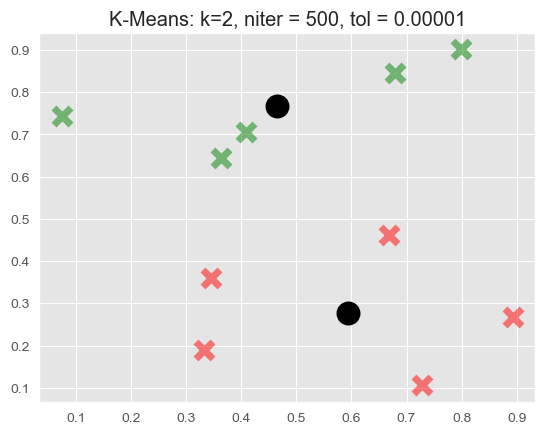

In [588]:
#boilerplate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
    
# let us define the style of the plot here
style.use('ggplot')
colors = ["g","r","c","b","y","m"]

# sample data for this example
p = np.array([[0.8922063, 0.26672425],[0.34475611, 0.35976697],[0.33253499, 0.18923898],[0.66872466, 0.46248986],[0.72823733, 0.10537784],[0.40903598, 0.70639412],[0.79926596, 0.90095583],[0.67886544, 0.84573289],[0.3641813, 0.64296743],[0.07461196, 0.74290527]])

# Define a function to plot the K-Means result as we need this logic in the last step
def plot_kmeans_result(plot_title, points, clusters, centroids):
    # plot each point in the points array, colored according to the cluster they belong
    for i in range(len(clusters)):
        plt.scatter(points[i,0],points[i,1], marker="x", color=colors[clusters[i]], s=150, linewidths=5, alpha=0.5)

    # plot each point in the centroids array
    for centroid_ in centroids:
        plt.scatter(centroid_[0],centroid_[1], marker="o", color="k", s=150, linewidths=5)

    plt.title(plot_title)
    plt.show()

clusters, centroids = kmeans(p, 500, 0.00001, 2)
# plot all elements
plot_kmeans_result("K-Means: k=2, niter = 500, tol = 0.00001", p, clusters, centroids)

### Step 9

Write a function <b>inertia</b> that takes three input arguments: $points$, $clusters$, and $centroids$.<br>
Where $points$ is a 2-dimensional ndarray with the coordinates of each point in your dataset, clusters is a vector that indicates the cluster of each point (takes values between $0$ and $K-1$), and $centroids$ is a 2-dimensional ndarray with length $k$ of the coordinates of the centroids.

The function should return a tuple in which the first value is the number of clusters and the second is the computed **average squared Euclidean distance** of the points to the centroid of the cluster they are assigned.
The Squared of the Euclidean distance is a common measure of error that satisfies several important properties, namely it is strictly convex and smooth. It is often used in the method of Least Squares to fit linear functions to data, in which we try to find the parameters of a linear model that minimize the average of the square distances between the observed values and the values predicted by the fitted model. Here we are borrowing these concepts to measure the dispersion of points in a cluster, in other words, the error between the position of the centroid and the locations of the points associated with it.

**Test your function and report the results of using point=p, clusters=c, and centroids=cen. These are the variables that you have used in the previous steps.**

<span style="color:red">**Note: distance always refers to the euclidean distance.**</span>

In [589]:
# In the inertia function we decided to use pandas because it seems simpler to join
# and manipulate all the input arrays
def inertia(points, clusters, centroids):
  points_dataframe = pd.DataFrame(points)
  points_dataframe['cluster'] = pd.Series(clusters)
  
  # Join the points DataFrame with the centroids (as DataFrame), using the cluster column
  # in the points DataFrame and the index of centroid DataFrame.
  # We also use the suffixes parameter to avoid conflict with column names
  df = pd.merge(points_dataframe, pd.DataFrame(centroids), left_on="cluster", right_index=True, suffixes=("_point", "_centroid"))
  
  # Create a new computed column that contain the distance from the point to the centroid
  df["distance_point_to_centroid"] = \
      df.apply(lambda row: distance(np.array([row["0_point"], row["1_point"]]), np.array([row["0_centroid"], row["1_centroid"]]))**2, axis=1)
  
  # Calculate the sum of distances per cluster.
  # Here we're using the within-cluster distance instead of the average.
  # We tried several ways of calculating the average distance but all of these result in a very strange elbow plot.
  # Searching about K-Means and the inertia formula we found that usually the sum of squared distances are used instead of the average, and it
  # provides us better values of inertia
  sum_distance_per_cluster = df.groupby("cluster")["distance_point_to_centroid"].sum().to_numpy()
  number_of_clusters = len(cen)
  
  # Return the tuple with number of clusters and sum of all distances of all clusters
  return number_of_clusters, sum(sum_distance_per_cluster)

In [590]:
inertia(p, c, cen)

(3, 1.0954209828084607)

### Step 10

Load the data from file https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1 into numpy array.<br>
The data consists of the coordinates of $N$ points in a 2-dimensional space. <br>
Use the functions <b>kmeans</b> and <b>inertia</b> to identify the most suitable number of clusters. <br>
**You must consider doing some visual inspection and reporting**. For instance:
- Inspect visually the dataset before performing the clustering.
- Report the inertia values as a line plot.
- Show the result of your clustering.

***Tip: use the output of inertia to perform the elbow method https://en.wikipedia.org/wiki/Elbow_method_(clustering).***

In [591]:
data_clustering = pd.read_csv("https://www.dropbox.com/s/wco3lxgn1f4a5k2/data_custering.csv?dl=1", header=None).to_numpy()

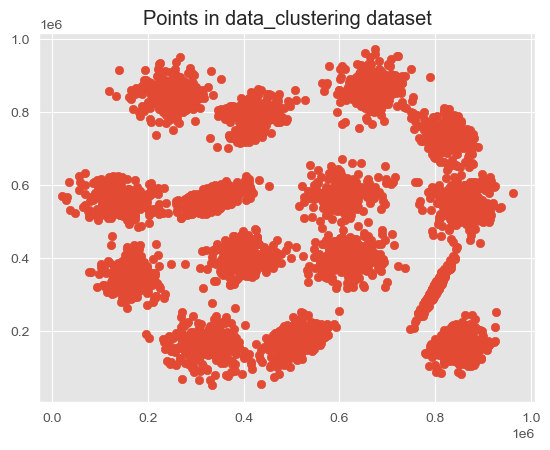

In [592]:
plt.scatter(x=data_clustering[:,0], y=data_clustering[:,1])
plt.title("Points in data_clustering dataset")

plt.show()

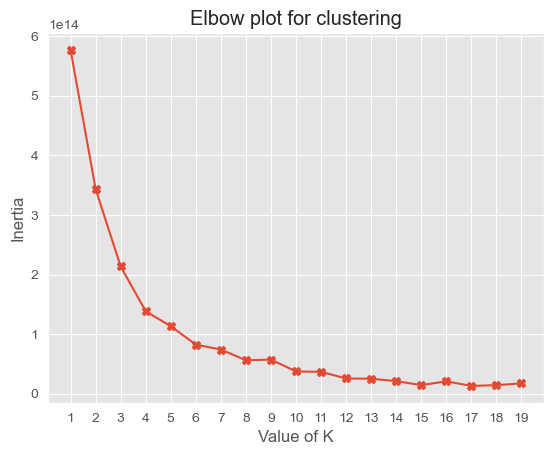

In [593]:
k_range = range(1, 20)
inertias = []

for k in k_range:
    clusters, centroids = kmeans(data_clustering, 100, 0.00001, k)
    number_of_clusters, inertia_value = inertia(data_clustering, clusters, centroids)
    inertias.append(inertia_value)

plt.plot(k_range, inertias, 'X-')
plt.xlabel("Value of K")
plt.ylabel("Inertia")
plt.title("Elbow plot for clustering")

# This is needed to use the actual values of K in the X axis.
# If we don't put the above line of code, matplotlib can break the scale plotting points
# like 12.5 in X-axis
plt.xticks(k_range)

plt.show()

Observing the plot of the Inertia using the elbow method, we can check that the line start to become flat with k=4.

k=6 also seems to be a good candidate, as the difference between 4 and 6 is still small, but not so small.

Below are the plots of k=4 and k=6 for visual comparison

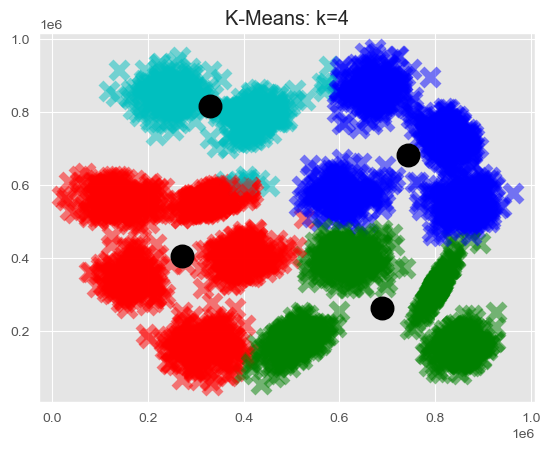

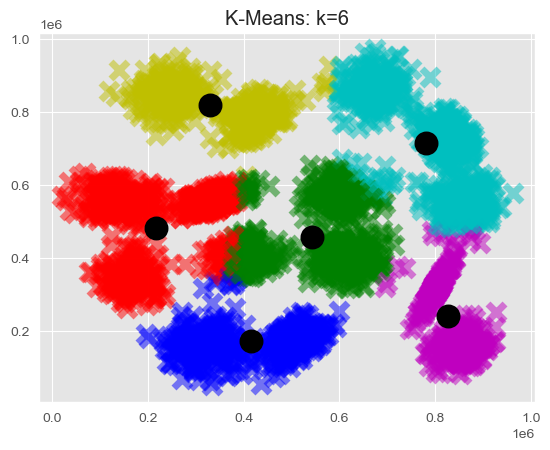

In [594]:
clusters, centroids = kmeans(data_clustering, 100, 0.00001, 4)
plot_kmeans_result("K-Means: k=4", data_clustering, clusters, centroids)

clusters, centroids = kmeans(data_clustering, 100, 0.00001, 6)
plot_kmeans_result("K-Means: k=6", data_clustering, clusters, centroids)

# Conclusion:

We observed that with k=4 we have 4 well separated clusters. 

With k=6 we see more clusters but seems that the clusters are not well separated (some colors are "leaking" to other clusters).

Taking the above statement into account plus using the elbow method, we can conclude that the optimal number of clusters to this dataset (and this implementation of k-means) is k=4.